In [0]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from PIL import Image
import numpy as np
# Import and Initialize Sentiment Analyzer
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



     |████████████████████████████████| 368kB 2.4MB/s eta 0:00:01


In [0]:

# Twitter API Keys
access_token  = 'ACCESSTOKEN'
access_token_secret  = 'ACCESSSEC'
consumer_key= 'CONSUMERKEY'
consumer_secret= 'CONSUMERSEC'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [0]:

# Target Search Term
target_terms = ["@ChennaiIPL"]
# ,"@DelhiCapitals","@ChennaiIPL","@mipaltan","@RCBTweets"\
#                 ,"@lionsdenkxip","@KKRiders","@rajasthanroyals"]


# Array to hold sentiment
sentiment_array = []

# Variable for holding the oldest tweet
oldest_tweet = ""
i=0
sentiments=[]
counter=1


In [0]:
# Loop through all target users
for target in target_terms:
    print(target)
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    
    i+=1
    # Run search around each tweet
    print("Retrieving data for %s" % target)
    public_tweets = api.user_timeline(target, count=10000)
    #print(public_tweets)
    # Loop through all tweets
    for tweet in public_tweets:
        text=str(tweet["text"])
        #print(tweet)
      # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        # Add each value to the appropriate array
        sentiments.append({"User": target,
                           "text":text,
                       "Date": tweet["created_at"], 
                       "Compound": compound,
                       "Positive": pos,
                       "Negative": neu,
                       "Neutral": neg,
                       "Tweets Ago": counter})
    counter+=1

    
   

@ChennaiIPL
Retrieving data for @ChennaiIPL


In [0]:
sentiments_pd=pd.DataFrame(sentiments)
sentiments_pd.to_csv("Output/Sentiments.csv")


@SunRisers


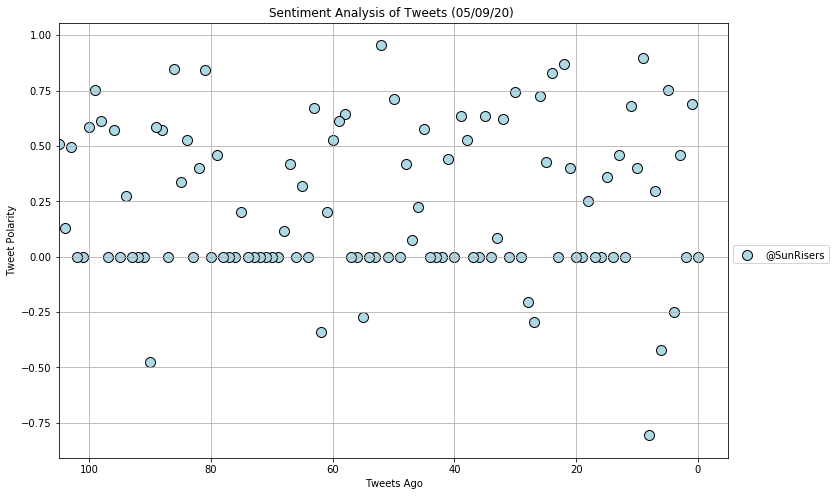

In [0]:
colors = ["lightblue",'green',"red","blue","yellow"]
user=sentiments_pd["User"].unique()
#print(user)
i=0
plt.figure(figsize=(12,8))
for channel in target_terms:
    
    print(channel)
    tweet_ago = np.arange(len(sentiments_pd[sentiments_pd['User']==channel]['Compound']))
    plt.scatter(tweet_ago, sentiments_pd[sentiments_pd['User']==channel]['Compound'],  marker ='o', color=colors[i], s=100,edgecolor="black", label = channel)
    i+=1
plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.legend(loc = 'best',bbox_to_anchor=(1, 0.5), frameon=True)
plt.savefig("Output/Sentiment")
plt.grid(True)
#plt.legend(target_terms,loc="best")
plt.show()



# # Incorporate the other graph properties


##### It can be seen from the plot above that CBS news are positive in nature. 

In [0]:
sent_table = sentiments_pd.pivot_table(index='User',  values="Compound", aggfunc=np.mean)
sent_table

,Compound
User,
@SunRisers,0.230517


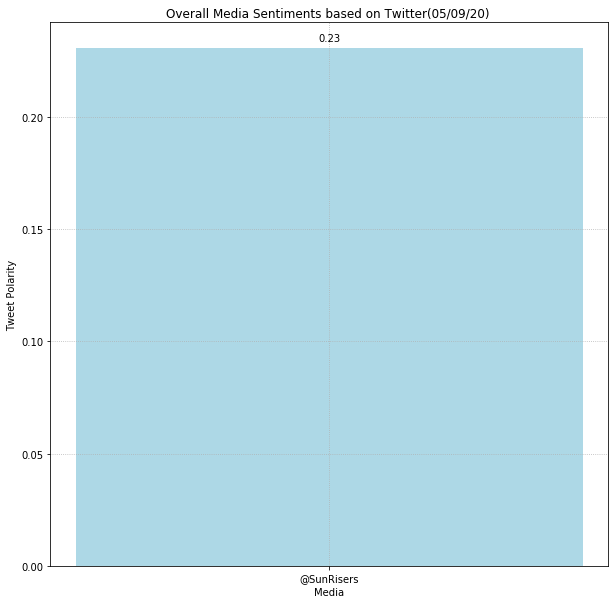

In [0]:
x_axis = np.arange(len(sent_table.index.values))
tick_locations = [value+0.4 for value in x_axis]
fig,ax=plt.subplots(figsize=(10,10))
plt.xticks(tick_locations, sent_table.index.values, rotation="horizontal")
#colors = ["blue",'green',"red","black","yellow"]
rect=plt.bar(sent_table.index.values, sent_table["Compound"], color=colors, alpha=1, align="edge")
plt.grid()
#plt.title("Sentiment Analysis of Tweets (%s) " % (time.strftime("%x")))
plt.title("Overall Media Sentiments based on Twitter(%s) " % (time.strftime("%x")))
plt.xlabel("Media")
plt.ylabel("Tweet Polarity")
ax.grid(linestyle="dotted")

def autolabel(rects, ax):
    j=0
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                str(round(sent_table.values[j][0],2)),
                ha='center', va='bottom')
        j+=1
autolabel(rect,ax)
plt.savefig("Output/Overall")
plt.show()





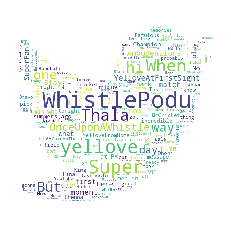

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# join tweets to a single string
words = ' '.join(sentiments_pd['text'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(
                      mask = logomask,
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=2000,
                      height=2000
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_1.png', dpi=300)
plt.show()